## Toronto emotional speech set (TESS) Collection

These stimuli were modeled on the Northwestern University Auditory Test No. 6 (NU-6; Tillman & Carhart, 1966). A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total.

Two actresses were recruited from the Toronto area. Both actresses speak English as their first language, are university educated, and have musical training. Audiometric testing indicated that both actresses have thresholds within the normal range.

Authors: Kate Dupuis, M. Kathleen Pichora-Fuller

University of Toronto, Psychology Department, 2010.

Files are also available to download via Scholars Portal Dataverse. https://doi.org/10.5683/SP2/E8H2MF 

# EDA OF Tess Dataset
Only Based on 2 Speakers-a young female and older female which bias in audio features but it should be balanced the male dominant speakers on dataset SAVEE

7 key emotions in this dataset-angry,disgust,happy,fear,neutral,Pleasant_surprise,sad

In [6]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [7]:
TESS="/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [8]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()


female_fear        400
female_sad         400
female_angry       400
female_disgust     400
female_surprise    400
female_neutral     400
female_happy       400
Name: labels, dtype: int64

We have around 400 files for a particular 200 from old female and 200 from young female.

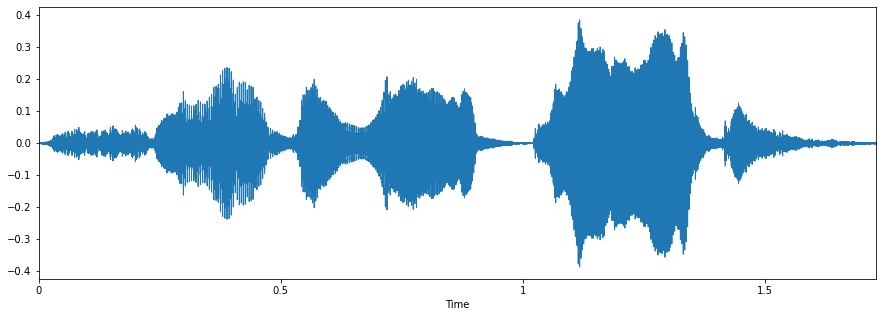

In [9]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

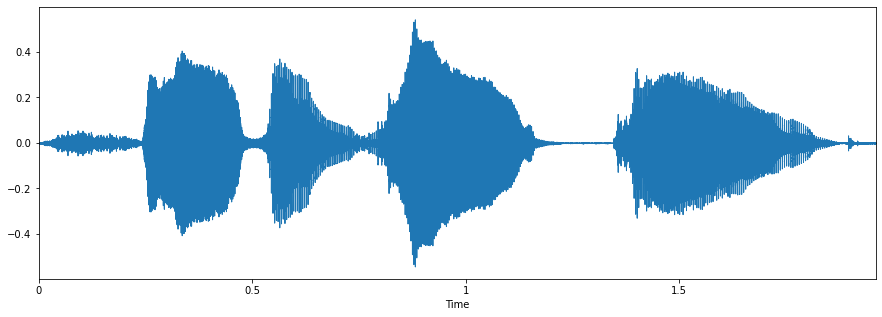

In [10]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [11]:
cd ../input/toronto-emotional-speech-set-tess/

/kaggle/input/toronto-emotional-speech-set-tess


In [12]:
ls

'TESS Toronto emotional speech set data'/
'tess toronto emotional speech set data'/


In [13]:
cd 'TESS Toronto emotional speech set data'/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


Here In this we are doing EDA on Old Talker who is speaking in angry manner and she is saying 200 words ' say the word - $word ' is what they say in all audio files

In [14]:
cd  OAF_angry

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry


In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

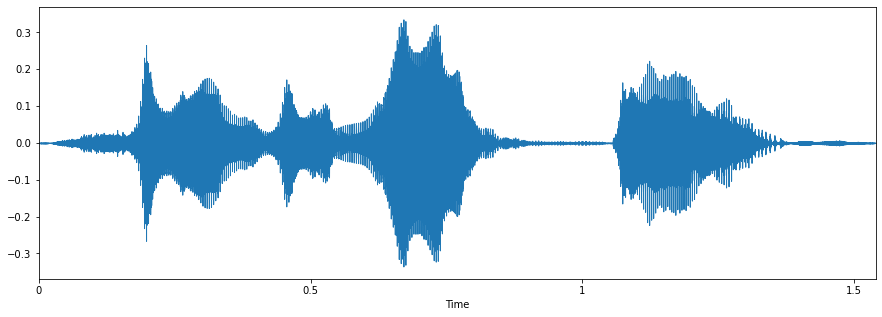

In [16]:
data, sampling_rate = librosa.load('OAF_back_angry.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
#ipd.Audio('../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav')

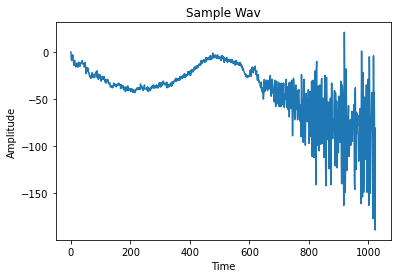

In [17]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read('OAF_back_angry.wav')
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

import wave

#Few observations: they are all in mono format,none in stereo format,sample rate=22050 x.shape is the length of the audio in samples(meaning more the samples,longer the audio

In [18]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [19]:
File_Names=os.listdir('OAF_angry')

In [20]:
ls

OAF_Fear/               OAF_disgust/  YAF_disgust/  YAF_pleasant_surprised/
OAF_Pleasant_surprise/  OAF_happy/    YAF_fear/     YAF_sad/
OAF_Sad/                OAF_neutral/  YAF_happy/
OAF_angry/              YAF_angry/    YAF_neutral/


In [21]:
cd OAF_angry/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry


In [22]:
Max=1
Min=2
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(34902,)
(34018,)
(37391,)
(33360,)
(32128,)
(34972,)
(33642,)
(36936,)
(41020,)
(35477,)
(34762,)
(36292,)
(30317,)
(34093,)
(35116,)
(36414,)
(35963,)
(34557,)
(34433,)
(34452,)
(38056,)
(34963,)
(30247,)
(38337,)
(32723,)
(34173,)
(37387,)
(31170,)
(35647,)
(34358,)
(32955,)
(35426,)
(39793,)
(38331,)
(33936,)
(37148,)
(33826,)
(35040,)
(32864,)
(33225,)
(35107,)
(36554,)
(33515,)
(34752,)
(32471,)
(36015,)
(36834,)
(34582,)
(34119,)
(37941,)
(34254,)
(34050,)
(29914,)
(36945,)
(34757,)
(33738,)
(34512,)
(36879,)
(34406,)
(33232,)
(37767,)
(31616,)
(38788,)
(37538,)
(31858,)
(31473,)
(34725,)
(37041,)
(32875,)
(33226,)
(32125,)
(35305,)
(33514,)
(36300,)
(34002,)
(33894,)
(31425,)
(33279,)
(36723,)
(38020,)
(37074,)
(31590,)
(32346,)
(33476,)
(36471,)
(34100,)
(33194,)
(32336,)
(37577,)
(33750,)
(35972,)
(39743,)
(31546,)
(35223,)
(31925,)
(30829,)
(36439,)
(33425,)
(33281,)
(36299,)
(37085,)
(32685,)
(35806,)
(32566,)
(35785,)
(35802,)
(33956,)
(33806,)
(33749,)
(34489,)
(33680,)
(

# OAF_fear

In [23]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [24]:
File_Names=os.listdir('OAF_Fear')

In [25]:
cd OAF_Fear/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Fear


In [26]:
Max=1
Min=2
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(37467,)
(37627,)
(36035,)
(36696,)
(31888,)
(34907,)
(35725,)
(34414,)
(36394,)
(34866,)
(37686,)
(34922,)
(34414,)
(40328,)
(38124,)
(32375,)
(33966,)
(28849,)
(38319,)
(34838,)
(34897,)
(34997,)
(36209,)
(35149,)
(36765,)
(35470,)
(32098,)
(37525,)
(30942,)
(35432,)
(37372,)
(35433,)
(30137,)
(35300,)
(39030,)
(32992,)
(40233,)
(37258,)
(34386,)
(33956,)
(34871,)
(39768,)
(39068,)
(35391,)
(34925,)
(38334,)
(33012,)
(37220,)
(34315,)
(35814,)
(37074,)
(36328,)
(37302,)
(37042,)
(39285,)
(34953,)
(36544,)
(36522,)
(36682,)
(36946,)
(37833,)
(37344,)
(33345,)
(30718,)
(28618,)
(35972,)
(28597,)
(32504,)
(33773,)
(34465,)
(36034,)
(36021,)
(37715,)
(33040,)
(35134,)
(34964,)
(30761,)
(35155,)
(36147,)
(35174,)
(35489,)
(37673,)
(35186,)
(34763,)
(33723,)
(40492,)
(36216,)
(33042,)
(38146,)
(36608,)
(40283,)
(34075,)
(35029,)
(37120,)
(34141,)
(33895,)
(39885,)
(34316,)
(38715,)
(36555,)
(37094,)
(32794,)
(34641,)
(36531,)
(37125,)
(38142,)
(30678,)
(38157,)
(32695,)
(36620,)
(36862,)
(

# OAF_disgust/

In [27]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [28]:
File_Names=os.listdir('OAF_disgust')

In [29]:
cd OAF_disgust/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_disgust


In [30]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(56690,)
(48282,)
(48331,)
(52780,)
(53254,)
(49300,)
(59775,)
(47054,)
(54710,)
(54608,)
(45702,)
(49788,)
(50145,)
(53065,)
(47936,)
(51103,)
(49986,)
(55155,)
(51724,)
(52604,)
(54016,)
(52342,)
(50066,)
(51023,)
(49841,)
(52086,)
(50838,)
(51766,)
(55327,)
(53500,)
(56053,)
(50175,)
(52310,)
(49184,)
(48661,)
(47568,)
(53799,)
(53872,)
(51278,)
(53414,)
(47216,)
(52790,)
(57538,)
(51282,)
(49266,)
(51568,)
(55232,)
(51080,)
(60714,)
(53400,)
(47698,)
(52916,)
(51446,)
(53841,)
(52302,)
(46963,)
(48839,)
(50674,)
(53658,)
(50017,)
(54592,)
(54771,)
(52646,)
(49744,)
(54083,)
(53142,)
(51845,)
(55381,)
(55021,)
(58789,)
(53866,)
(49500,)
(53522,)
(52159,)
(55401,)
(50828,)
(52649,)
(53218,)
(52410,)
(49771,)
(51729,)
(53765,)
(56907,)
(51939,)
(54779,)
(50973,)
(52668,)
(48628,)
(50117,)
(49151,)
(51339,)
(52258,)
(55911,)
(56465,)
(55547,)
(56432,)
(50882,)
(50596,)
(51122,)
(51805,)
(51389,)
(53638,)
(53670,)
(51993,)
(44490,)
(51221,)
(56318,)
(50184,)
(47433,)
(58257,)
(50699,)
(

# OAF_sad/

In [31]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [32]:
File_Names=os.listdir('OAF_Sad')

In [33]:
cd OAF_Sad/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Sad


In [34]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(53540,)
(51756,)
(56721,)
(57605,)
(58439,)
(56339,)
(55343,)
(62662,)
(59640,)
(54838,)
(53882,)
(48844,)
(54126,)
(60330,)
(50152,)
(61002,)
(60116,)
(57392,)
(51891,)
(57983,)
(56180,)
(52640,)
(58764,)
(63435,)
(57486,)
(57809,)
(56187,)
(54799,)
(55263,)
(56799,)
(55759,)
(61254,)
(55475,)
(53902,)
(56501,)
(57079,)
(54176,)
(57936,)
(53782,)
(60570,)
(58514,)
(59290,)
(56741,)
(65815,)
(53554,)
(55946,)
(55214,)
(59502,)
(58668,)
(55880,)
(56518,)
(56175,)
(56660,)
(48322,)
(57695,)
(53596,)
(57142,)
(54696,)
(55209,)
(57228,)
(56982,)
(53185,)
(57509,)
(55713,)
(55666,)
(64564,)
(53454,)
(54863,)
(58204,)
(57584,)
(55304,)
(52043,)
(53454,)
(58115,)
(52443,)
(58017,)
(51245,)
(53689,)
(57631,)
(55395,)
(50113,)
(59817,)
(57719,)
(53960,)
(57154,)
(52851,)
(52704,)
(56558,)
(56571,)
(55985,)
(54567,)
(54056,)
(52869,)
(53937,)
(58612,)
(52739,)
(53872,)
(62929,)
(56602,)
(64322,)
(53814,)
(58024,)
(57673,)
(56501,)
(50846,)
(54619,)
(56794,)
(64252,)
(52470,)
(54931,)
(56843,)
(

# OAF_Pleasant_surprise/

In [35]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [36]:
File_Names=os.listdir('OAF_Pleasant_surprise')

In [37]:
cd OAF_Pleasant_surprise/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_Pleasant_surprise


In [38]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(46583,)
(50387,)
(48263,)
(43179,)
(40693,)
(45216,)
(46829,)
(48790,)
(47941,)
(49033,)
(40040,)
(41007,)
(45620,)
(45447,)
(43442,)
(48950,)
(41133,)
(47517,)
(48572,)
(48755,)
(44334,)
(38275,)
(36970,)
(39740,)
(42911,)
(43575,)
(42506,)
(41138,)
(40102,)
(52804,)
(43168,)
(42494,)
(47097,)
(40191,)
(48894,)
(40666,)
(47022,)
(45797,)
(48177,)
(42520,)
(43741,)
(46593,)
(46263,)
(44815,)
(42189,)
(49446,)
(43678,)
(50564,)
(47883,)
(41408,)
(39323,)
(43911,)
(39097,)
(45649,)
(43767,)
(52992,)
(41217,)
(46600,)
(47662,)
(44620,)
(42655,)
(50154,)
(42684,)
(51563,)
(44188,)
(42729,)
(45554,)
(45458,)
(42471,)
(47748,)
(47373,)
(47731,)
(48437,)
(44587,)
(47865,)
(40555,)
(40388,)
(48383,)
(42589,)
(47128,)
(43802,)
(46390,)
(40389,)
(41822,)
(48011,)
(44570,)
(54167,)
(41811,)
(42266,)
(47344,)
(45342,)
(44218,)
(42813,)
(45897,)
(44164,)
(45439,)
(49313,)
(49730,)
(43313,)
(43680,)
(43251,)
(45548,)
(43727,)
(46544,)
(41030,)
(46700,)
(52280,)
(52258,)
(46884,)
(46169,)
(46207,)
(

# OAF_neutral/

In [39]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [40]:
File_Names=os.listdir('OAF_neutral')

In [41]:
cd OAF_neutral/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_neutral


In [42]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(43559,)
(41609,)
(41181,)
(45683,)
(38103,)
(44536,)
(48824,)
(42707,)
(45341,)
(49370,)
(38215,)
(43748,)
(42581,)
(44731,)
(46576,)
(45779,)
(44390,)
(43406,)
(46627,)
(42716,)
(44278,)
(40837,)
(43631,)
(46406,)
(42720,)
(47245,)
(45165,)
(42710,)
(44032,)
(46154,)
(41546,)
(43566,)
(40788,)
(45890,)
(44427,)
(46575,)
(43679,)
(47848,)
(42897,)
(41079,)
(42623,)
(44638,)
(44459,)
(47399,)
(40476,)
(47090,)
(42528,)
(43078,)
(45863,)
(44436,)
(43492,)
(47700,)
(41380,)
(42738,)
(45281,)
(47734,)
(41213,)
(43626,)
(48402,)
(47404,)
(46024,)
(48096,)
(42797,)
(44642,)
(45235,)
(46074,)
(47951,)
(46833,)
(50434,)
(47200,)
(42373,)
(39397,)
(41797,)
(46020,)
(46941,)
(42270,)
(43848,)
(46865,)
(44203,)
(49363,)
(46679,)
(46522,)
(46703,)
(42367,)
(42674,)
(40867,)
(42613,)
(47663,)
(42261,)
(43217,)
(44144,)
(45789,)
(48491,)
(43373,)
(41340,)
(44209,)
(49433,)
(43655,)
(47563,)
(45355,)
(45573,)
(45058,)
(43705,)
(46363,)
(39894,)
(45492,)
(44228,)
(41954,)
(45264,)
(44371,)
(40520,)
(

#  OAF_happy/

In [43]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [44]:
File_Names=os.listdir('OAF_happy/')

In [45]:
cd OAF_happy/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy


In [46]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

(45616,)
(46143,)
(46792,)
(43716,)
(43942,)
(40605,)
(45253,)
(41780,)
(43610,)
(44493,)
(43849,)
(42374,)
(44121,)
(42712,)
(42652,)
(44874,)
(42844,)
(42447,)
(43614,)
(45364,)
(47532,)
(43610,)
(40970,)
(40173,)
(43323,)
(47395,)
(44390,)
(44933,)
(41684,)
(47616,)
(42409,)
(44357,)
(44921,)
(44046,)
(43750,)
(44342,)
(44320,)
(47455,)
(40602,)
(46756,)
(44831,)
(44623,)
(40255,)
(44108,)
(38420,)
(46579,)
(44971,)
(46045,)
(41843,)
(44937,)
(48372,)
(44230,)
(42459,)
(45572,)
(44408,)
(45868,)
(48661,)
(42011,)
(42442,)
(43612,)
(45287,)
(44893,)
(45048,)
(41325,)
(40486,)
(44166,)
(49559,)
(41563,)
(43369,)
(43718,)
(44922,)
(44277,)
(43261,)
(39022,)
(41843,)
(42571,)
(47656,)
(46756,)
(42772,)
(43628,)
(44720,)
(44524,)
(43002,)
(41108,)
(40248,)
(43752,)
(41654,)
(43338,)
(43351,)
(43657,)
(41146,)
(47700,)
(41765,)
(45535,)
(46479,)
(42095,)
(45995,)
(43520,)
(44743,)
(44750,)
(41101,)
(44800,)
(46714,)
(45980,)
(45276,)
(46278,)
(42000,)
(42759,)
(39482,)
(45540,)
(35964,)
(

# YAF_disgust/ 

In [47]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [48]:
File_Names=os.listdir('YAF_disgust/')

In [49]:
cd YAF_disgust/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust


In [50]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

2.5297873015873016
YAF_sheep_disgust.wav 2.2053968253968255
YAF_seize_disgust.wav 2.8556916099773244


# YAF_pleasant_surprised/

In [51]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [52]:
File_Names=os.listdir('YAF_pleasant_surprised/')

In [53]:
cd YAF_pleasant_surprised/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised


In [54]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

1.9749331065759639
YAF_numb_ps.wav 1.6500680272108843
YAF_door_ps.wav 2.4546031746031747


#   YAF_fear/     

In [55]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [56]:
File_Names=os.listdir('YAF_fear/')

In [57]:
cd YAF_fear/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear


In [58]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

1.715152154195011
YAF_choice_fear.wav 1.2541043083900227
YAF_haze_fear.wav 2.061451247165533


# YAF_sad/

In [59]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [60]:
File_Names=os.listdir('YAF_sad/')

In [61]:
cd YAF_sad/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_sad


In [62]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

2.268395238095239
YAF_chair_sad.wav 1.9420861678004535
YAF_keep_sad.wav 2.690249433106576


# YAF_happy/

In [63]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [64]:
File_Names=os.listdir('YAF_happy/')

In [65]:
cd YAF_happy/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_happy


In [66]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

1.9422975056689338
YAF_tough_happy.wav 1.728888888888889
YAF_mess_happy.wav 2.2355555555555555


# YAF_angry/ 

In [67]:
cd ..

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [68]:
File_Names=os.listdir('YAF_angry/')

In [69]:
cd YAF_angry/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_angry


In [70]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

2.1131671201814064
YAF_burn_angry.wav 1.6341043083900226
YAF_five_angry.wav 2.503401360544218


#    YAF_neutral/

In [71]:
    cd ..      

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data


In [72]:
File_Names=os.listdir('YAF_neutral/')

In [73]:
cd YAF_neutral/

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_neutral


In [ ]:
Max=1
Min=3
Max_File_Name= ''
Min_File_Name= ''
sum=0
average=0
for file in File_Names:
    x, sr = librosa.load(file)
    length=librosa.get_duration(y=x, sr=sr)
    sum=sum+length
    if length > Max:
       Max=length
       Max_File_Name=file
    if length < Min:
       Min=length
       Min_File_Name=file
average=sum/200
print(average)
print(Min_File_Name,Min)
print(Max_File_Name,Max)

Results: https://docs.google.com/spreadsheets/d/149iS0mC3PbC0Lv1OYSs_-CbGEy6ufvfkYAVDvI0Rsvk/edit#gid=0